# Parsing XMLTYPE documents and surface analytics

### In this task wants to upload any xml file with something numeric-type data and check Benford's law
-------
Task:  
1) Check Benford's law by two any xml-files  
2) Make service with automatic file uploading and sreening them.  

-------
First of all we want to download any libs that we'll use.

In [94]:
from urllib.request import urlopen
import math
import numpy as np
import pandas as pd
import scipy.stats as ss
from functools import reduce
from scipy.optimize import minimize
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter,OrderedDict
import xml.etree.ElementTree as ET
%matplotlib inline
SEED = 1000

In [95]:
plt.rcParams["axes.labelsize"] = 16. 
plt.rcParams["xtick.labelsize"] = 14. 
plt.rcParams["ytick.labelsize"] = 14. 
plt.rcParams["legend.fontsize"] = 12. 
plt.rcParams["figure.figsize"] = [15., 6.]

Make manual test entry...

In [97]:
data = urlopen('http://crimestat.ru/loadXml/21034201').read().decode('utf8')

... And make first benford_decomposition function

In [98]:
def benford_decomposition(data, keyword):
    dat = str(data)
    tag = 0
    mass = []
    keyw_closer = '</' + keyword[1:]
    while keyw_closer in dat:
        mass.append(int(str(dat[dat.find(keyword)+len(keyword):dat.find(keyw_closer)])[0]))
        dat = dat[dat.find(keyw_closer)+len(keyw_closer):]
    rr = Counter(mass)
    vv = list(OrderedDict(sorted(rr.items(), key=lambda t: t[0])).values())[1:]
    return vv

Getting our first empirical data

In [99]:
mass = benford_decomposition(data,'<value>')

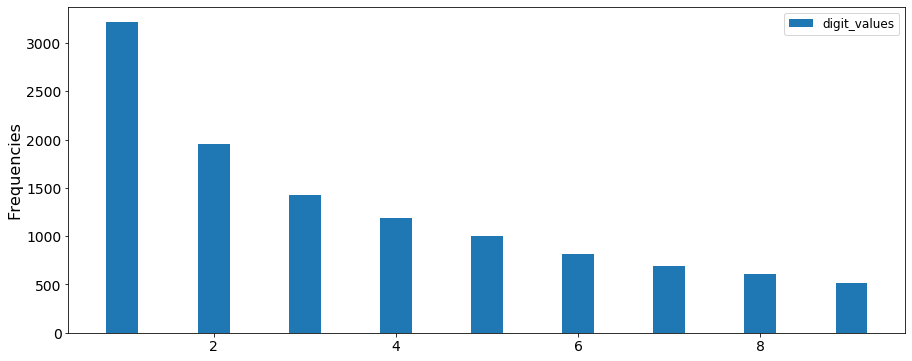

In [100]:
labels = list(range(1, 10))
digits = mass
width = 0.35
fig, ax = plt.subplots()
ax.bar(labels, digits, width, label='digit_values')

ax.set_ylabel('Frequencies')
ax.legend()

plt.show()

Well, let's output the data in quantitative terms of values based on absolute indicators

Let's calculate the theoretical data from Benford's law and visualize them immediately in relative quantities

In [101]:
benford_freq = [0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]
benford_dist = []
for i in range(9):
    benford_dist += [i+1]*round(benford_freq[i]*sum(mass))

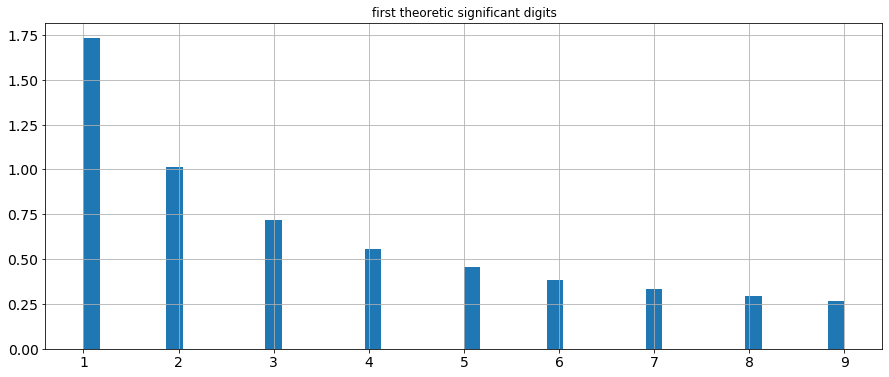

In [102]:
dat_1 = pd.DataFrame({'first theoretic significant digits':benford_dist})
dat_1.hist(bins = 'rice', normed = 'true')
plt.show()

Cmparing received sets of distributions

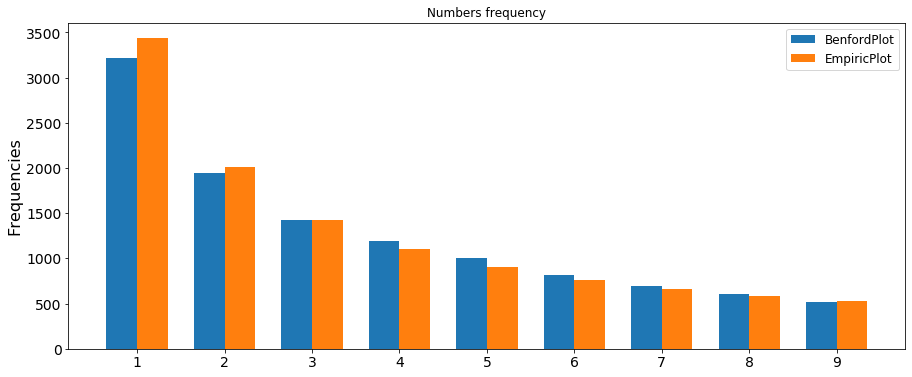

In [103]:
mass_means = mass
benford_means = [benford_dist.count(v) for v in range(1, 10)]
x = np.arange(1, 10)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mass_means, width, label='BenfordPlot')
rects2 = ax.bar(x + width/2, benford_means, width, label='EmpiricPlot')

ax.set_ylabel('Frequencies')
ax.set_title('Numbers frequency')
ax.set_xticks(x)
ax.legend()

plt.show()

______
### Now we'll import the data from somewhere else

In [104]:
tree = ET.parse('data-20200314T0000-structure-20171115T0000.xml')
root = tree.getroot()

In [105]:
tup = [int(root[b][4].text[0]) for b in range(len(root))]
rr = Counter(tup)
vv = list(OrderedDict(sorted(rr.items(), key=lambda t: t[0])).values())[1:]

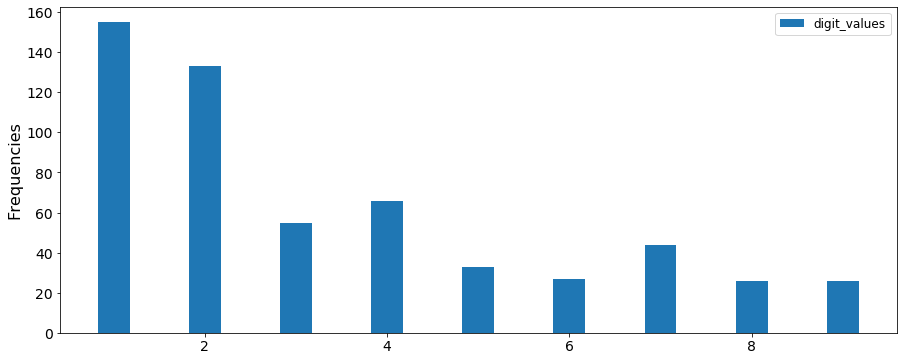

In [106]:
labels = list(range(1,10))
digits = vv
width = 0.35
fig, ax = plt.subplots()
ax.bar(labels, digits, width, label='digit_values')

ax.set_ylabel('Frequencies')
ax.legend()

plt.show()

Let's compare our result with Benford's table plot

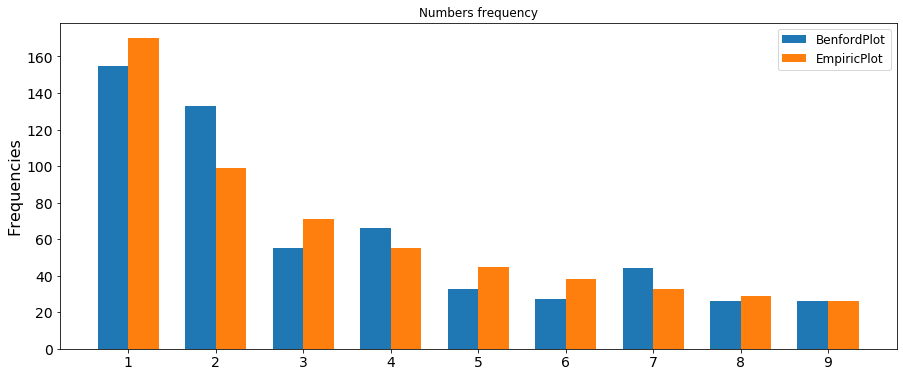

In [107]:
mass_means = vv
benford_dist1 = []
for i in range(9):
    benford_dist1 += [i+1]*round(benford_freq[i]*sum(vv))
benford_means1 = [benford_dist1.count(v) for v in range(1, 10)]
x = np.arange(1, 10)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mass_means, width, label = 'BenfordPlot')
rects2 = ax.bar(x + width/2, benford_means1, width, label = 'EmpiricPlot')

ax.set_ylabel('Frequencies')
ax.set_title('Numbers frequency')
ax.set_xticks(x)
ax.legend()

plt.show()